In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging
import pandas as pd
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

%matplotlib inline

np.random.seed(1234)

In [ ]:
#Load the two datasets

data = pd.read_csv("NHANES_age_prediction.csv")
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

featureD2 = breast_cancer_wisconsin_original.data.features
targetD2 = breast_cancer_wisconsin_original.data.targets



In [ ]:
# Import pandas
import pandas as pd

# Combine featureD2 and targetD2 into a single DataFrame
df = pd.DataFrame(featureD2)
df['Class'] = targetD2

# Drop rows with missing values
df = df.dropna()

# Split the data into features and target
featureD2 = df.drop('Class', axis=1)
targetD2 = df['Class']





In [ ]:
#Perform Basic Calculations with Data
import copy

correlation_with_age = data.corr()['RIDAGEYR'].abs()

threshold = .01

low_correlation_features = correlation_with_age[correlation_with_age < threshold].index.tolist()


print("Correlation of each feature with age (RIDAGEYR):")
print(correlation_with_age.sort_values(ascending=False))

data.drop(low_correlation_features, axis=1, inplace=True)


counts = data['age_group'].value_counts()
print(f"Adults and seniors class distribution:\n{counts}")


adults_data = data[data['age_group'] == 'Adult']
seniors_data = data[data['age_group'] == 'Senior']

float_columns = data.select_dtypes(include=['float64']).columns

mean_features_adults = adults_data[float_columns].mean()
mean_features_seniors = seniors_data[float_columns].mean()


print(f"Mean of features for adults:\n{mean_features_adults}")
print(f"Mean of features for seniors:\n{mean_features_seniors}")


squared_diff = (mean_features_adults - mean_features_seniors) ** 2
ranked_features = squared_diff.sort_values(ascending=False)
print(f"Ranked features for seniors and adults:\n{ranked_features}")

df = pd.DataFrame(featureD2)
df['Class'] = targetD2

df = df.dropna()

counts = df['Class'].value_counts()
print(f"Cancer and no cancer class distribution:\n{counts}")

cancer = df[df['Class'] == 4]
no_cancer = df[df['Class'] == 2]

mean_features_cancer = cancer.mean()
mean_features_no_cancer = no_cancer.mean()
print(f"Mean of features for cancer:\n{mean_features_cancer}")
print(f"Mean of features for no cancer:\n{mean_features_no_cancer}")

squared_diff = (mean_features_cancer - mean_features_no_cancer) ** 2
ranked_features = squared_diff.sort_values(ascending=False)
print(f"Ranked features for cancer and no cancer:\n{ranked_features}")

featureD2 = df.drop('Class', axis=1)
targetD2 = df['Class']

Correlation of each feature with age (RIDAGEYR):
RIDAGEYR    1.000000
LBXGLT      0.318044
LBXGLU      0.229624
BMXBMI      0.147163
LBXIN       0.091879
DIQ010      0.049970
PAQ605      0.025973
SEQN        0.008806
RIAGENDR    0.006398
Name: RIDAGEYR, dtype: float64
Adults and seniors class distribution:
Adult     1914
Senior     364
Name: age_group, dtype: int64
Mean of features for adults:
RIDAGEYR     35.780564
PAQ605        1.806165
BMXBMI       27.968286
LBXGLU       98.644723
DIQ010        2.014107
LBXGLT      109.990596
LBXIN        12.106661
dtype: float64
Mean of features for seniors:
RIDAGEYR     73.425824
PAQ605        1.909341
BMXBMI       27.886264
LBXGLU      104.329670
DIQ010        2.027473
LBXGLT      141.208791
LBXIN        10.405247
dtype: float64
Ranked features for seniors and adults:
RIDAGEYR    1417.165594
LBXGLT       974.575736
LBXGLU        32.318625
LBXIN          2.894810
PAQ605         0.010645
BMXBMI         0.006728
DIQ010         0.000179
dtype: float6

<ipython-input-4-36b7c6a58857>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_age = data.corr()['RIDAGEYR'].abs()


# KNN Class

In [ ]:

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:
    def __init__(self, K=1, dist_fn=euclidean):
        self.dist_fn = dist_fn
        self.K = K

    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None, :, :], x_test[:, None, :])
        knns = np.zeros((num_test, self.K), dtype=int)
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i, :] = np.argsort(distances[i])[:self.K]
            y_prob[i, :] = np.bincount(self.y[knns[i, :]], minlength=self.C)
        y_prob /= self.K
        return y_prob, knns

In [ ]:
import matplotlib.pyplot as plt


x = data.iloc[:, 3:].values
y = data['age_group'].factorize()[0]


# Print the feature shape and classes of dataset
(N, D), C = x.shape, np.unique(y).size
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

inds = np.random.permutation(N)

# Split the dataset into 80% train and 20% test
split_idx = int(N * 0.8)
x_train, y_train = x[inds[:split_idx]], y[inds[:split_idx]]
x_test, y_test = x[inds[split_idx:]], y[inds[split_idx:]]



(N, D), C = featureD2.shape, np.unique(y).size
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

inds = np.random.permutation(N)

# Split the dataset into 80% train and 20% test
split_idx = int(N * 0.8)
featureD2_train, targetD2_train = featureD2.iloc[inds[:split_idx]].to_numpy(), targetD2.iloc[inds[:split_idx]].to_numpy()
featureD2_test, targetD2_test = featureD2.iloc[inds[split_idx:]].to_numpy(), targetD2.iloc[inds[split_idx:]].to_numpy()
targetD2_train = targetD2_train.ravel()
targetD2_test = targetD2_test.ravel()

instances (N) 	 2278 
 features (D) 	 5 
 classes (C) 	 2
instances (N) 	 683 
 features (D) 	 9 
 classes (C) 	 2


# Accuracy/Selecting Proper HyperParameter


In [ ]:
#Accuracy function
# Test different K values
K_values = [1, 3,5,7,9,11,15]
print("For Dataset 1:")
for myK in K_values:
    model = KNN(K=myK)

    # Training accuracy for D1
    y_prob_train, _ = model.fit(x_train, y_train).predict(x_train)
    y_pred_train = np.argmax(y_prob_train, axis=-1)
    train_accuracy = np.sum(y_pred_train == y_train) / y_train.shape[0]

    # Test accuracy for D1
    y_prob_test, knns = model.predict(x_test)
    y_pred_test = np.argmax(y_prob_test, axis=-1)
    test_accuracy = np.sum(y_pred_test == y_test) / y_test.shape[0]

    print(f'K = {myK}: Train Accuracy = {train_accuracy * 100:.1f}%, Test Accuracy = {test_accuracy * 100:.1f}%.')
    print('---' * 10)

print("\n")
print("For Dataset 2:")

for myK in K_values:
    model = KNN(K=myK)


    # Training accuracy for D2
    y_prob_train, _ = model.fit(featureD2_train, targetD2_train.ravel()).predict(featureD2_train)
    y_pred_train = np.argmax(y_prob_train, axis=-1)
    train_accuracy = np.sum(y_pred_train == targetD2_train) / targetD2_train.shape[0]

    # Test accuracy for D2
    y_prob_test, knns = model.predict(featureD2_test)
    y_pred_test = np.argmax(y_prob_test, axis=-1)
    test_accuracy = np.sum(y_pred_test == targetD2_test) / targetD2_test.shape[0]

    print(f'K = {myK}: Train Accuracy = {train_accuracy * 100:.1f}%, Test Accuracy = {test_accuracy * 100:.1f}%.')
    print('---' * 10)



For Dataset 1:
K = 1: Train Accuracy = 100.0%, Test Accuracy = 76.8%.
------------------------------
K = 3: Train Accuracy = 89.1%, Test Accuracy = 78.7%.
------------------------------
K = 5: Train Accuracy = 86.9%, Test Accuracy = 80.7%.
------------------------------
K = 7: Train Accuracy = 85.6%, Test Accuracy = 81.6%.
------------------------------
K = 9: Train Accuracy = 85.7%, Test Accuracy = 82.0%.
------------------------------
K = 11: Train Accuracy = 85.8%, Test Accuracy = 81.8%.
------------------------------
K = 15: Train Accuracy = 85.3%, Test Accuracy = 82.7%.
------------------------------


For Dataset 2:
K = 1: Train Accuracy = 100.0%, Test Accuracy = 94.9%.
------------------------------
K = 3: Train Accuracy = 98.2%, Test Accuracy = 96.4%.
------------------------------
K = 5: Train Accuracy = 97.8%, Test Accuracy = 97.1%.
------------------------------
K = 7: Train Accuracy = 97.6%, Test Accuracy = 97.1%.
------------------------------
K = 9: Train Accuracy = 96.9%

# ROC
(KNN)

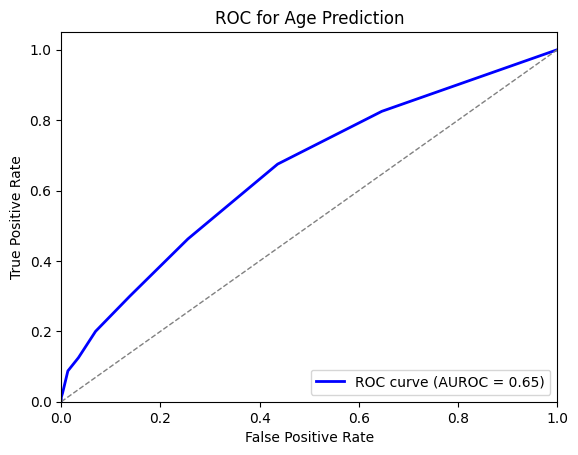

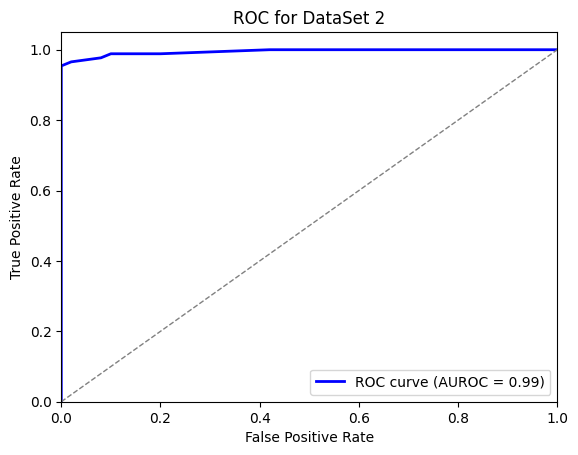

In [ ]:
#ROC+AUROC for KNN
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

binary_y_test = (y_test == 1).astype(int)

model = KNN(K=11)
model.fit(x_train, y_train)

y_prob_test, _ = model.predict(x_test)
y_prob_test_senior = y_prob_test[:, 1]

fpr, tpr, thresholds = roc_curve(binary_y_test, y_prob_test_senior)
roc_auc = roc_auc_score(binary_y_test, y_prob_test_senior)

# Plot the ROC curve.
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUROC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Age Prediction')
plt.legend(loc="lower right")
plt.show()

#---------------------------------------------------------------------------
#DataSet 2

binary_y_test = (targetD2_test == 2).astype(int)

model = KNN(K=11)
model.fit(featureD2_train, targetD2_train)

y_prob_test, _ = model.predict(featureD2_test)
y_prob_test_senior = y_prob_test[:, 2]

fpr, tpr, thresholds = roc_curve(binary_y_test, y_prob_test_senior)
roc_auc = roc_auc_score(binary_y_test, y_prob_test_senior)

# Plot the ROC curve.
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUROC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for DataSet 2')
plt.legend(loc="lower right")
plt.show()



# Splitting Test and Train in half and selecting K


best K = 11, test accuracy = 0.8179824561403509
best K = 10, test accuracy = 0.9562043795620438


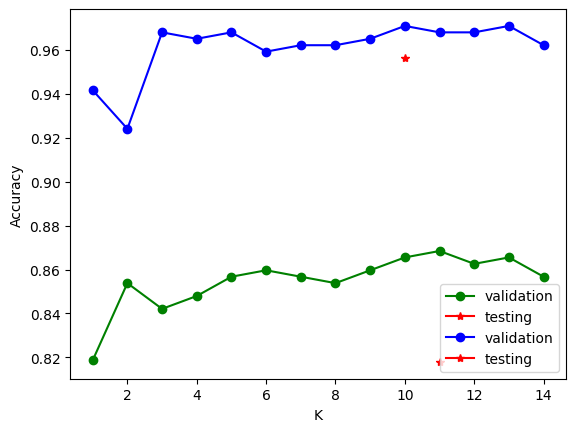

In [ ]:
#Selecting Proper HyperParameter || You can split the data into training, validation and testing and use the validation set to se- lect the best K and the best tree depth and evaluate the best choice on the test set.
#(Creativity points)

# Further split the training data into 50% training and 50% validation
split_idx = int(N * 0.5)
x_train_tr, y_train_tr = x[inds[:split_idx]], y[inds[:split_idx]]
x_train_va, y_train_va = x[inds[split_idx:]], y[inds[split_idx:]]


model_choices=[]
valid_acc = []

n_valid = y_train_va.shape[0]

for k in range(1,15):
    knn = KNN(K=k)
    y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    model_choices.append(k)
    valid_acc.append(accuracy)

#best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='Green', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('KNN_chooseK.png',dpi=300,bbox_inches='tight')


#------------------------------------------------------------------------------
#DataSet 2

# further split the training data into 50% training and 50% validation
split_idx = int(N * 0.5)
featureD2_train_tr, targetD2_train_tr = featureD2.iloc[inds[:split_idx]].to_numpy(), targetD2.iloc[inds[:split_idx]].to_numpy()
featureD2_train_va, targetD2_train_va = featureD2.iloc[inds[split_idx:]].to_numpy(), targetD2.iloc[inds[split_idx:]].to_numpy()
targetD2_train_tr = targetD2_train_tr.ravel()
targetD2_train_va = targetD2_train_va.ravel()

model_choices=[]
valid_acc = []

n2_valid = targetD2_train_va.shape[0]

for k in range(1,15):
    knn = KNN(K=k)
    targetD2_train_va_prob,_ = knn.fit(featureD2_train_tr, targetD2_train_tr).predict(featureD2_train_va) # bug fixed
    targetD2_train_va_pred = np.argmax(targetD2_train_va_prob,axis=-1)
    accuracy = np.sum(targetD2_train_va_pred == targetD2_train_va)/n2_valid
    model_choices.append(k)
    valid_acc.append(accuracy)

#best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
targetD2_test_prob,_ = knn.fit(featureD2_train, targetD2_train).predict(featureD2_test)
targetD2_test_pred = np.argmax(targetD2_test_prob, axis=-1)
test_accuracy = np.sum(targetD2_test_pred == targetD2_test)/targetD2_test.shape[0]
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('KNN_chooseK1.png',dpi=300,bbox_inches='tight')

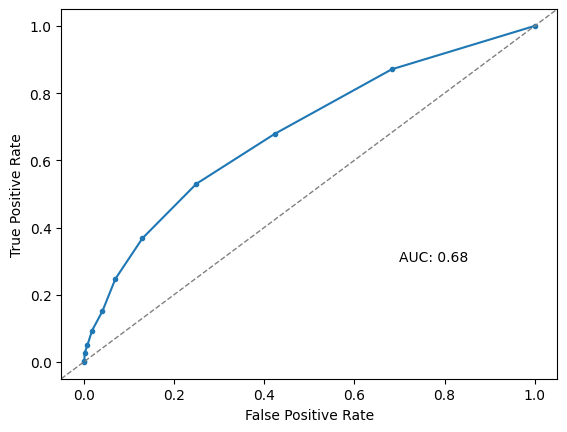

In [ ]:
#5 fold implementation of KNN
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score


def cross_validate(model, X_input, Y_output):
    kf = KFold(n_splits=5, random_state=1, shuffle=True)
    y = np.array([0] * X_input.shape[0])
    yh = np.empty((X_input.shape[0],2))

    for train_index, test_index in kf.split(X_input):
        model.fit(X_input[train_index], Y_output[train_index])
        y[test_index] = Y_output[test_index]
        yh[test_index]= model.predict(X_input[test_index])[0]
    return y, yh[:,0]

knn = KNN(K=11)

true_labels, pred_scores = cross_validate(knn, x,y)
pred_scores = 1 - pred_scores
fpr, tpr, _ = roc_curve(true_labels, pred_scores)
auc = roc_auc_score(true_labels, pred_scores)

fig = plt.figure()
ax = fig.add_subplot(111)

# Roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.text(0.7, 0.3, 'AUC: '+str(round(auc,2)))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('D2_prediction_knn_crossvalid_roc.png')

In [ ]:
#Load Datasets

data = pd.read_csv("NHANES_age_prediction.csv")
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

featureD2 = breast_cancer_wisconsin_original.data.features
targetD2 = breast_cancer_wisconsin_original.data.targets

import pandas as pd

df = pd.DataFrame(featureD2)
df['Class'] = targetD2

df = df.dropna()

featureD2 = df.drop('Class', axis=1)
targetD2 = df['Class']



#Perform Basic Calculations with Data
correlation_with_age = data.corr()['RIDAGEYR'].abs()
threshold = .01
low_correlation_features = correlation_with_age[correlation_with_age < threshold].index.tolist()
print("Correlation of each feature with age (RIDAGEYR):")
print(correlation_with_age.sort_values(ascending=False))

data.drop(low_correlation_features, axis=1, inplace=True)









Correlation of each feature with age (RIDAGEYR):
RIDAGEYR    1.000000
LBXGLT      0.318044
LBXGLU      0.229624
BMXBMI      0.147163
LBXIN       0.091879
DIQ010      0.049970
PAQ605      0.025973
SEQN        0.008806
RIAGENDR    0.006398
Name: RIDAGEYR, dtype: float64


<ipython-input-11-0530e50b5a42>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_age = data.corr()['RIDAGEYR'].abs()


In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None
        if parent:
            self.depth = parent.depth + 1
            self.num_classes = parent.num_classes
            self.data = parent.data
            self.labels = parent.labels
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes)
            self.class_prob = class_prob / np.sum(class_prob)


In [ ]:
def greedy_test(node, cost_fn):
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]
    return -np.sum(class_probs * np.log2(class_probs))

def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))

# Decision Tree Class

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_gini_index, min_leaf_instances=1):
        self.max_depth = max_depth
        self.root = None
        self.cost_fn = cost_fn
        self.num_classes = num_classes
        self.min_leaf_instances = min_leaf_instances

    def fit(self, data, labels):
        pass

    def predict(self, data_test):
        pass

In [ ]:
def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    if np.isinf(cost):
        return
    test = node.data[node.data_indices,split_feature] <= split_value
    node.split_feature = split_feature
    node.split_value = split_value
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    self._fit_tree(left)
    self._fit_tree(right)
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

In [ ]:
def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(1234)
x = data.iloc[:, 3:].values
y = data['age_group'].factorize()[0]

(N, D), C = x.shape, np.unique(y).size
inds = np.random.permutation(N)

# Split the dataset into 80% train and 20% test
split_idx = int(N * 0.8)
x_train, y_train = x[inds[:split_idx]], y[inds[:split_idx]]
x_test, y_test = x[inds[split_idx:]], y[inds[split_idx:]]


(N, D), C = featureD2.shape, np.unique(y).size
inds = np.random.permutation(N)
split_idx = int(N * 0.8)

featureD2_train,targetD2_train = featureD2.iloc[:split_idx].to_numpy(),targetD2.iloc[:split_idx].to_numpy()
featureD2_test,targetD2_test = featureD2.iloc[split_idx:].to_numpy(),targetD2.iloc[split_idx:].to_numpy()

targetD2_train = targetD2_train.ravel()
targetD2_test = targetD2_test.ravel()


ACCURACY FOR TRAIN AND TEST

In [ ]:
for depth in [1, 3, 5, 7, 9, 11,15]:
    tree = DecisionTree(max_depth=depth)
    tree.fit(x_train, y_train)

    # Predictions for training data
    probs_train = tree.predict(x_train)
    y_pred_train = np.argmax(probs_train, axis=1)
    train_accuracy = np.sum(y_pred_train == y_train) / y_train.shape[0]

    # Predictions for test data
    probs_test = tree.predict(x_test)
    y_pred_test = np.argmax(probs_test, axis=1)
    test_accuracy = np.sum(y_pred_test == y_test) / y_test.shape[0]

    print("Data Set 1")
    print(f'Depth: {depth}, Train Accuracy: {train_accuracy * 100:.1f}%, Test Accuracy: {test_accuracy * 100:.1f}%')
    print("------------------------------------------------")

for depth in [1, 3, 5, 7, 9, 11,15]:
    tree = DecisionTree(max_depth=depth)
    tree.fit(featureD2_train, targetD2_train)

    # Predictions for training data
    probs_train = tree.predict(featureD2_train)
    y_pred_train = np.argmax(probs_train, axis=1)
    train_accuracy = np.sum(y_pred_train == targetD2_train) / targetD2_train.shape[0]

    # Predictions for test data
    probs_test = tree.predict(featureD2_test)
    y_pred_test = np.argmax(probs_test, axis=1)
    test_accuracy = np.sum(y_pred_test == targetD2_test) / targetD2_test.shape[0]

    print("Data Set 2")
    print(f'Depth: {depth}, Train Accuracy: {train_accuracy * 100:.1f}%, Test Accuracy: {test_accuracy * 100:.1f}%')
    print("------------------------------------------------")






Data Set 1
Depth: 1, Train Accuracy: 84.4%, Test Accuracy: 82.5%
------------------------------------------------
Data Set 1
Depth: 3, Train Accuracy: 85.2%, Test Accuracy: 81.6%
------------------------------------------------
Data Set 1
Depth: 5, Train Accuracy: 86.5%, Test Accuracy: 81.1%
------------------------------------------------
Data Set 1
Depth: 7, Train Accuracy: 88.9%, Test Accuracy: 80.3%
------------------------------------------------
Data Set 1
Depth: 9, Train Accuracy: 91.4%, Test Accuracy: 78.5%
------------------------------------------------
Data Set 1
Depth: 11, Train Accuracy: 94.0%, Test Accuracy: 75.9%
------------------------------------------------
Data Set 1
Depth: 15, Train Accuracy: 96.9%, Test Accuracy: 75.4%
------------------------------------------------
Data Set 2
Depth: 1, Train Accuracy: 91.8%, Test Accuracy: 90.5%
------------------------------------------------
Data Set 2
Depth: 3, Train Accuracy: 97.4%, Test Accuracy: 94.9%
---------------------

2278
best depth = 1, test accuracy = 0.8245614035087719


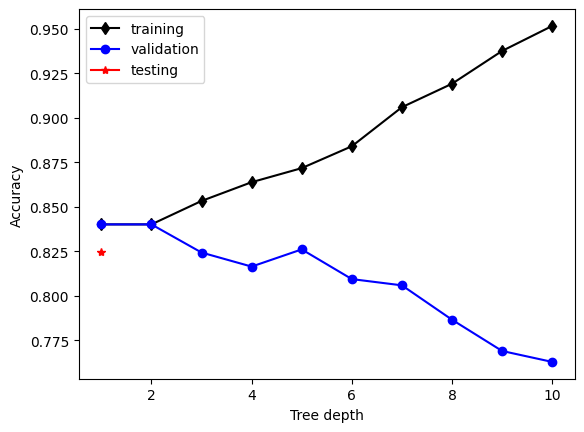

In [ ]:
# Further split the training data into 50% training and 50% validation Dataset1

(N, D), C = x.shape, np.unique(y).size
print(N)
np.random.seed(1234)
inds = np.random.permutation(N)

# Split the dataset into 80% train and 20% test
split_idx = int(N * 0.5)

X_train_tr, y_train_tr = x[inds[:split_idx]], y[inds[:split_idx]]
X_train_va, y_train_va = x[inds[split_idx:]], y[inds[split_idx:]]

model_choices=[]
train_acc = []
valid_acc = []

n_train = y_train_tr.shape[0]
n_valid = y_train_va.shape[0]

for k in range(1, 11):
    dt = DecisionTree(max_depth=k)

    y_train_tr_prob = dt.fit(X_train_tr, y_train_tr).predict(X_train_tr)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = np.sum(y_train_tr_pred == y_train_tr)/n_train

    y_train_va_prob = dt.fit(X_train_tr, y_train_tr).predict(X_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = np.sum(y_train_va_pred == y_train_va)/n_valid

    model_choices.append(k)
    train_acc.append(acc_tr)
    valid_acc.append(acc_va)

best_depth = model_choices[valid_acc.index(max(valid_acc))]
dt = DecisionTree(max_depth=best_depth)
y_test_prob = dt.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'best depth = {best_depth}, test accuracy = {test_accuracy}')

plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('DT_chooseDepth.png',dpi=300,bbox_inches='tight')

best depth = 2, test accuracy = 0.9343065693430657


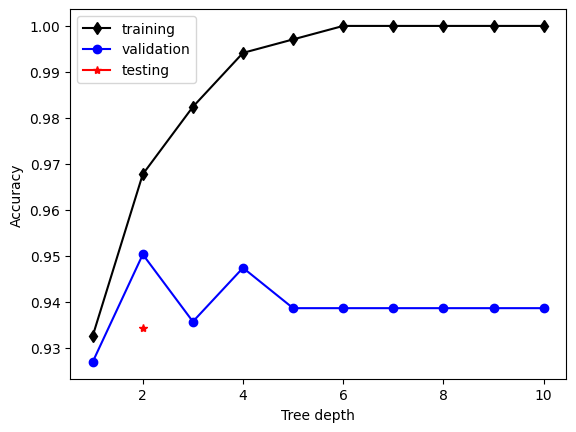

In [ ]:
# Further split the training data into 50% training and 50% validation Dataset2

(N, D), C = featureD2.shape, np.unique(y).size
np.random.seed(1234)
inds = np.random.permutation(N)
split_idx = int(N * 0.5)

X_train_tr, y_train_tr = featureD2.iloc[inds[:split_idx]].to_numpy(), targetD2.iloc[inds[:split_idx]].to_numpy()
X_train_va, y_train_va = featureD2.iloc[inds[split_idx:]].to_numpy(), targetD2.iloc[inds[split_idx:]].to_numpy()
y_train_tr = y_train_tr.ravel()
y_train_va = y_train_va.ravel()

model_choices=[]
train_acc = []
valid_acc = []

n_train = y_train_tr.shape[0]
n_valid = y_train_va.shape[0]

for k in range(1, 11):
    dt = DecisionTree(max_depth=k)

    y_train_tr_prob = dt.fit(X_train_tr, y_train_tr).predict(X_train_tr)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = np.sum(y_train_tr_pred == y_train_tr)/n_train

    y_train_va_prob = dt.fit(X_train_tr, y_train_tr).predict(X_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = np.sum(y_train_va_pred == y_train_va)/n_valid

    model_choices.append(k)
    train_acc.append(acc_tr)
    valid_acc.append(acc_va)

best_depth = model_choices[valid_acc.index(max(valid_acc))]
dt = DecisionTree(max_depth=best_depth)
y_test_prob = dt.fit(featureD2_train, targetD2_train).predict(featureD2_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == targetD2_test)/targetD2_test.shape[0]
print(f'best depth = {best_depth}, test accuracy = {test_accuracy}')

plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('DT_chooseDepth.png',dpi=300,bbox_inches='tight')

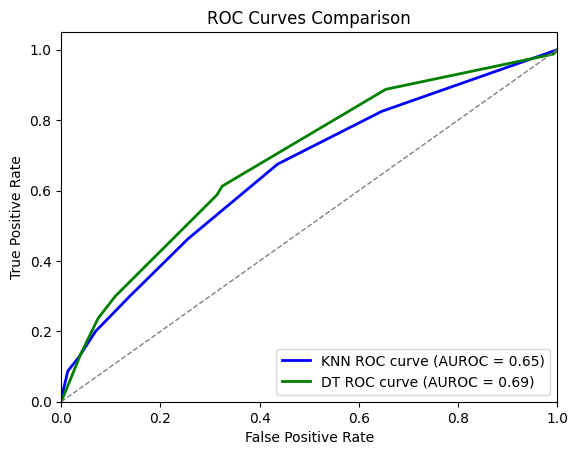

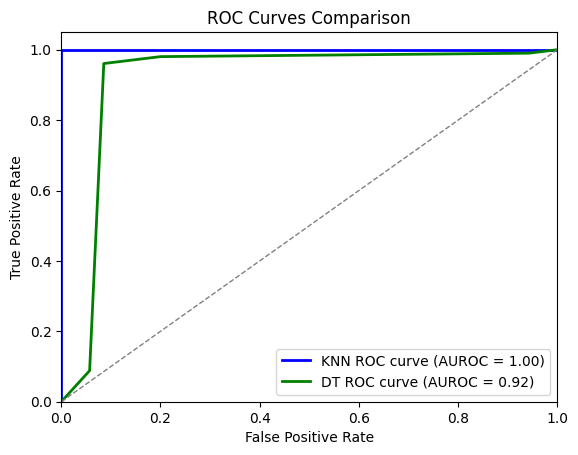

In [ ]:
#ROC+AUROC for KNN and DT

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

binary_y_test = (y_test == 1).astype(int)

# For KNN
model_knn = KNN(K=11)
model_knn.fit(x_train, y_train)

y_prob_test_knn, _ = model_knn.predict(x_test)
y_prob_test_senior_knn = y_prob_test_knn[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(binary_y_test, y_prob_test_senior_knn)
roc_auc_knn = roc_auc_score(binary_y_test, y_prob_test_senior_knn)

# For Decision Tree
model_dt = DecisionTree(max_depth=3)
model_dt.fit(x_train, y_train)

y_prob_test_dt = model_dt.predict(x_test)
y_prob_test_senior_dt = y_prob_test_dt[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(binary_y_test, y_prob_test_senior_dt)
roc_auc_dt = roc_auc_score(binary_y_test, y_prob_test_senior_dt)


# Plot the ROC curves
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN ROC curve (AUROC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'DT ROC curve (AUROC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.savefig('ROC_age1.png',dpi=300,bbox_inches='tight')
plt.show()


#---------------------------------------------------------------------------
#DataSet 2

# Convert y_test to binary format
binary_y_test = (targetD2_test == 2).astype(int)

# For KNN
model_knn = KNN(K=7)
model_knn.fit(featureD2_train, targetD2_train)

y_prob_test_knn, _ = model_knn.predict(featureD2_test)
y_prob_test_senior_knn = y_prob_test_knn[:, 2]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(binary_y_test, y_prob_test_senior_knn)
roc_auc_knn = roc_auc_score(binary_y_test, y_prob_test_senior_knn)

# For DT
model_dt = DecisionTree(max_depth=3)
model_dt.fit(featureD2_train, targetD2_train)

y_prob_test_dt = model_dt.predict(featureD2_test)
y_prob_test_senior_dt = y_prob_test_dt[:, 2]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(binary_y_test, y_prob_test_senior_dt)
roc_auc_dt = roc_auc_score(binary_y_test, y_prob_test_senior_dt)



# Plot the ROC curves

plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN ROC curve (AUROC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'DT ROC curve (AUROC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.savefig('ROC_D2.png',dpi=300,bbox_inches='tight')
plt.show()
